In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data
train = pd.read_csv('C:/Users/16476/KuleeshaModels/BigMart/train.csv')
test_sub = pd.read_csv('C:/Users/16476/KuleeshaModels/BigMart/test.csv')
print("train size",train.shape)
print("test size",test_sub.shape)

train['source'] = 'train'
test_sub['source'] = 'test'
test_sub['Item_Outlet_Sales'] = 0
base1 = test_sub[['Item_Identifier','Outlet_Identifier']]
overall = pd.concat([train, test_sub], sort=False)

overall.head(10)

train size (8523, 12)
test size (5681, 11)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,train
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,train
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,train


In [3]:
overall.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
overall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
Item_Identifier              14204 non-null object
Item_Weight                  11765 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  10188 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            14204 non-null float64
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.5+ MB


In [134]:
overall.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [3]:
cat_var = overall.select_dtypes(include =[np.object])
print(cat_var.shape)
num_var = overall.select_dtypes(include=[np.float64])
print(num_var.shape)

(14204, 8)
(14204, 4)


In [136]:
for col in overall:
    print(overall[col].unique())
    
overall.apply(lambda x : len(x.unique()))

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
[ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.67   6.11  17.2
  6.32   4.88   5.425 14.1    7.55  17.25  12.    10.1    7.785 13.15
  8.5    7.63   9.285  7.975 15.7    8.98

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [4]:
overall['Item_Fat_Content'] = overall['Item_Fat_Content'].replace(['Low Fat', 'low fat'], 'LF')
overall['Item_Fat_Content'] = overall['Item_Fat_Content'].replace(['Regular', 'reg'], 'R')
overall['Item_IDN'] = overall['Item_Identifier'].str[0:2]
overall['Item_Visibility'] = overall['Item_Visibility'].replace({0:np.nan})
overall.loc[overall['Item_IDN'] == 'NC', 'Item_Fat_Content'] = "NA"


In [140]:
overall.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_IDN
0,FDA15,9.300,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,FD
1,DRC01,5.920,R,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,DR
2,FDN15,17.500,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,FD
3,FDX07,19.200,R,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,FD
4,NCD19,8.930,NA,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,NC
5,FDP36,10.395,R,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train,FD
6,FDO10,13.650,R,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,train,FD
7,FDP10,13.000,LF,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train,FD
8,FDH17,16.200,R,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,train,FD
9,FDU28,19.200,R,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,train,FD


In [5]:
for var in cat_var:
    overall[var].fillna(method='ffill',inplace=True)
    
for var in num_var:
    mean = np.around(np.mean(overall[var]))
    overall[var].fillna(mean,inplace = True)

In [6]:
#add sales count as a new column
overall['Item_Sales_Count'] = overall['Item_Outlet_Sales']/overall['Item_MRP']
train['Item_Sales_Count'] = train['Item_Outlet_Sales']/train['Item_MRP']

In [7]:
#outlet establishment in years
overall['outlet_estb_years'] = 2019 - overall['Outlet_Establishment_Year']

In [13]:
for col in overall:
    print(overall[col].value_counts())

FDT14    10
NCJ19    10
FDR07    10
FDX47    10
FDS45    10
FDX48    10
FDU45    10
FDB58    10
FDO57    10
DRC27    10
FDP23    10
FDE35    10
FDY08    10
FDS08    10
FDZ10    10
FDZ07    10
NCN14    10
FDS13    10
FDH48    10
FDL36    10
FDE45    10
NCX29    10
FDX13    10
FDF28    10
FDB04    10
NCN41    10
FDB35    10
FDG10    10
FDM51    10
FDX46    10
         ..
FDC39     8
FDT33     8
FDH50     8
FDV02     8
FDS16     8
DRG13     8
NCI18     8
FDK60     8
FDP60     8
FDX25     8
FDJ21     8
FDZ31     8
NCR41     8
FDX33     8
NCE55     8
FDC40     8
FDJ52     8
FDI46     7
FDH58     7
FDO33     7
FDM50     7
FDM10     7
NCW54     7
FDX49     7
FDL50     7
DRN11     7
FDM52     7
FDR51     7
FDS22     7
NCL42     7
Name: Item_Identifier, Length: 1559, dtype: int64
13.000    2505
17.600     135
12.150     127
10.500     123
13.650     115
11.800     113
15.100     111
19.350     109
15.700     102
15.600     100
16.700     100
9.800       99
17.750      99
20.250      97
12.600  

Skew  1.1775306028542798
kurtosis val  1.6158766814287264


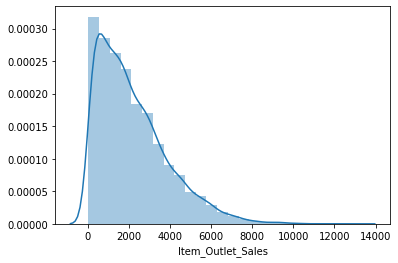

In [143]:
#univariate Analysis
#---target variable-----
sns.distplot(train.Item_Outlet_Sales, bins=25)
print("Skew ", train.Item_Outlet_Sales.skew())              #how much is the distribution skewed; symmeteric=0, skewed>0
print("kurtosis val ", train.Item_Outlet_Sales.kurt())      #heavy tailed : positive, light tailed:negative

Skew  0.5399515373932657
kurtosis val  0.24732881534565365


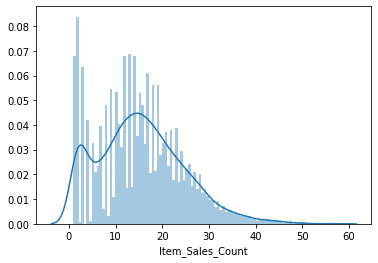

In [15]:
#---target variable-----
sns.distplot(train.Item_Sales_Count, bins=100)
print("Skew ", train.Item_Sales_Count.skew())              #how much is the distribution skewed; symmeteric=0, skewed>0
print("kurtosis val ", train.Item_Sales_Count.kurt()) 

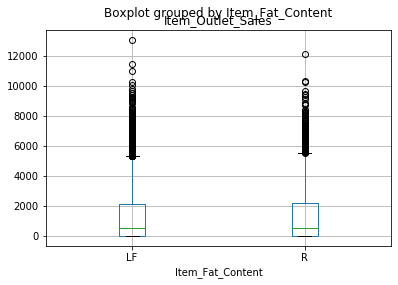

In [16]:
overall.boxplot(column='Item_Outlet_Sales',by='Item_Fat_Content')

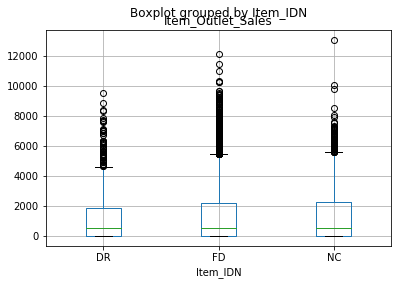

In [17]:
overall.boxplot(column='Item_Outlet_Sales',by='Item_IDN')

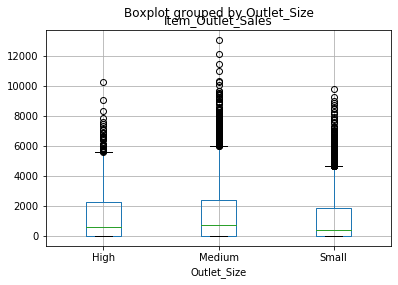

In [18]:
overall.boxplot(column='Item_Outlet_Sales',by='Outlet_Size')

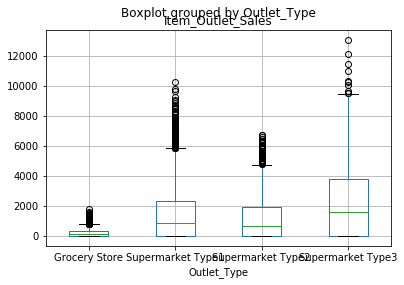

In [19]:
overall.boxplot(column='Item_Outlet_Sales',by='Outlet_Type')

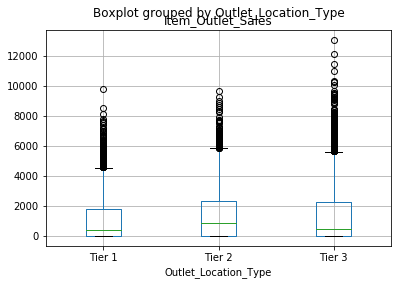

In [20]:
overall.boxplot(column='Item_Outlet_Sales',by='Outlet_Location_Type')

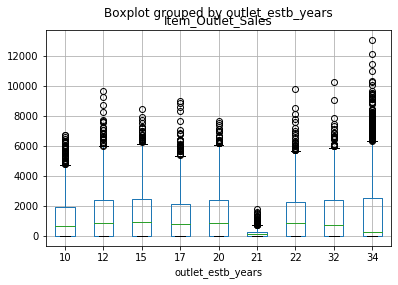

In [21]:
overall.boxplot(column='Item_Outlet_Sales',by='outlet_estb_years')

Text(0, 0.5, 'Item_MRP')

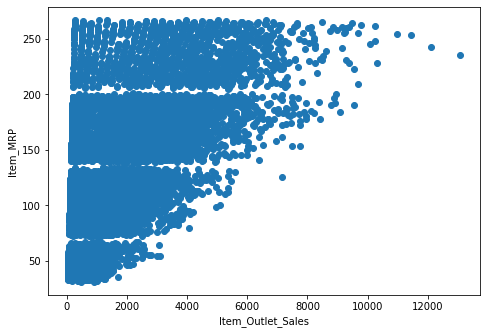

In [22]:
#scatter plots
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(train.Item_Outlet_Sales, train.Item_MRP)
ax.set_xlabel('Item_Outlet_Sales')
ax.set_ylabel('Item_MRP')

Text(0, 0.5, 'Item_MRP')

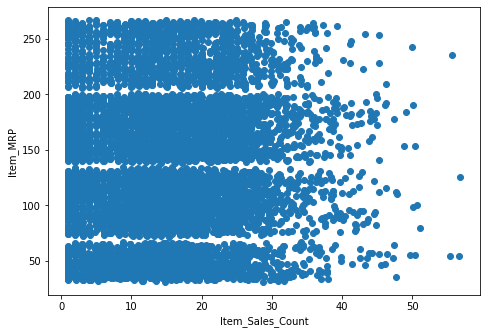

In [23]:
#scatter plots
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(train.Item_Sales_Count, train.Item_MRP)
ax.set_xlabel('Item_Sales_Count')
ax.set_ylabel('Item_MRP')

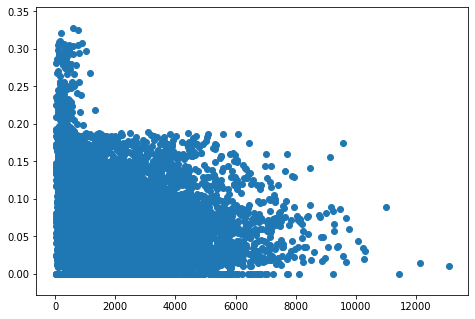

In [24]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(train.Item_Outlet_Sales, train.Item_Visibility)

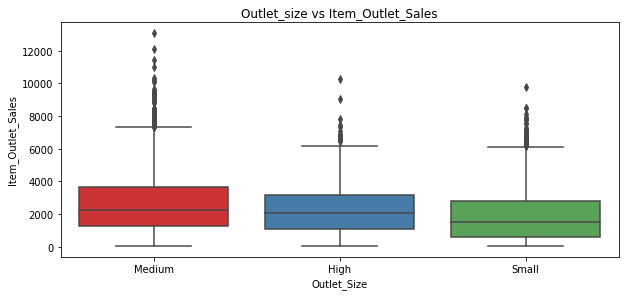

In [25]:
plt.figure(figsize =(10,9))
plt.subplot(311)

ax = sns.boxplot(x = 'Outlet_Size',y = 'Item_Outlet_Sales',data=train ,palette="Set1")
ax.set_title("Outlet_size vs Item_Outlet_Sales")
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)


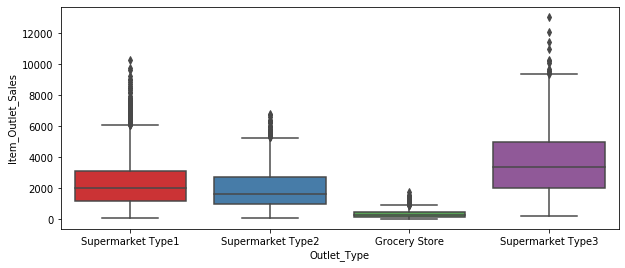

In [26]:
plt.figure(figsize=(10,9))
plt.subplot(212)

ax = sns.boxplot(x ='Outlet_Type' ,y='Item_Outlet_Sales',data=train,palette="Set1" )

In [8]:
#Correlation between variables
numeric_features = train.select_dtypes(include=[np.number])            #np.number: get a subset of all numeric datatypes
#print(numeric_features.dtypes)

corr = numeric_features.corr()
#print(corr)
print(corr.Item_Outlet_Sales.sort_values())

Item_Visibility             -0.128625
Outlet_Establishment_Year   -0.049135
Item_Weight                  0.014123
Item_MRP                     0.567574
Item_Sales_Count             0.759315
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64


In [145]:
corr = numeric_features.corr(method='spearman')
#print(corr)
print(corr.Item_Outlet_Sales.sort_values())

Item_Visibility             -0.115076
Item_Weight                  0.015062
Outlet_Establishment_Year    0.042947
Item_MRP                     0.562986
Item_Sales_Count             0.788282
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64


In [9]:

var_mod = ['Item_Fat_Content','Outlet_Identifier', 'Outlet_Location_Type','Outlet_Size','Item_IDN','Outlet_Type']
    
overall = pd.get_dummies(overall,columns = var_mod)
print(overall.dtypes)


Item_Identifier                   object
Item_Weight                      float64
Item_Visibility                  float64
Item_Type                         object
Item_MRP                         float64
Outlet_Establishment_Year          int64
Item_Outlet_Sales                float64
source                            object
Item_Sales_Count                 float64
outlet_estb_years                  int64
Item_Fat_Content_LF                uint8
Item_Fat_Content_NA                uint8
Item_Fat_Content_R                 uint8
Outlet_Identifier_OUT010           uint8
Outlet_Identifier_OUT013           uint8
Outlet_Identifier_OUT017           uint8
Outlet_Identifier_OUT018           uint8
Outlet_Identifier_OUT019           uint8
Outlet_Identifier_OUT027           uint8
Outlet_Identifier_OUT035           uint8
Outlet_Identifier_OUT045           uint8
Outlet_Identifier_OUT046           uint8
Outlet_Identifier_OUT049           uint8
Outlet_Location_Type_Tier 1        uint8
Outlet_Location_

In [150]:
df.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'outlet_estb_years',
       'Item_Fat_Content_LF', 'Item_Fat_Content_NA', 'Item_Fat_Content_R',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Size_High', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Item_IDN_DR', 'Item_IDN_FD', 'Item_IDN_NC',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [12]:
from sklearn.model_selection import train_test_split

df = overall.loc[overall['source']=="train"]

#Separate the test data for submission
submission_test = overall.loc[overall['source']=="test"]

Y = df['Item_Outlet_Sales']
df = df.drop(columns=['Item_Outlet_Sales', 'Item_Identifier', 'source', 'Item_Sales_Count', 'Outlet_Establishment_Year', 'Item_Type'])
submission_test= submission_test.drop(columns=['Item_Identifier', 'source', 'Item_Sales_Count', 'Item_Outlet_Sales', 'Outlet_Establishment_Year', 'Item_Type'])

print(df.shape)
print(Y.shape)

#divide the training data further into test and train
x_train, x_test, y_train, y_test = train_test_split(df, Y, test_size = 0.33, random_state = 5)


(8523, 30)
(8523,)


In [34]:
print(x_train.shape)
print(x_test.shape)
print(submission_test.shape)
x_train.info()

(5710, 30)
(2813, 30)
(5681, 30)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5710 entries, 6763 to 2915
Data columns (total 30 columns):
Item_Weight                      5710 non-null float64
Item_Visibility                  5710 non-null float64
Item_MRP                         5710 non-null float64
outlet_estb_years                5710 non-null int64
Item_Fat_Content_LF              5710 non-null uint8
Item_Fat_Content_NA              5710 non-null uint8
Item_Fat_Content_R               5710 non-null uint8
Outlet_Identifier_OUT010         5710 non-null uint8
Outlet_Identifier_OUT013         5710 non-null uint8
Outlet_Identifier_OUT017         5710 non-null uint8
Outlet_Identifier_OUT018         5710 non-null uint8
Outlet_Identifier_OUT019         5710 non-null uint8
Outlet_Identifier_OUT027         5710 non-null uint8
Outlet_Identifier_OUT035         5710 non-null uint8
Outlet_Identifier_OUT045         5710 non-null uint8
Outlet_Identifier_OUT046         5710 non-null uint8
Out

In [21]:
##Regression
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

featureSelec = x_train.columns

def getSigniCol():
     #using stats value to measure p-val of coef
    X = sm.add_constant(x_train)
    mod = sm.OLS(y_train, X)
    modFit = mod.fit()
#     print(modFit.summary())
#     print(modFit.pvalues)
    signifCol = []
    for key, value in modFit.pvalues.iteritems():       
        if value<0.05 and key != 'const':
            signifCol.append(key)

    print(signifCol)
    
    return x_train[signifCol], submission_test[signifCol], x_test[signifCol]

def regressionAnalysis(method, param ):
    
    x_train_subset = x_train[featureSelec]
    x_test_subset = x_test[featureSelec]
    submission_test_subset = submission_test[featureSelec]
    
    if method == 'LR':       
        x_train_subset, submission_test_subset, x_test_subset= getSigniCol()
        reg = LinearRegression(normalize=True)               
    elif method == 'RR':
        reg = Ridge(alpha=param[0],normalize=True)
    elif method == 'DTR':
        reg = DecisionTreeRegressor(max_depth=param[1], min_samples_leaf=param[2])
    else:
        reg = RandomForestRegressor(n_estimators=param[3],max_depth=param[1], min_samples_leaf=param[2],n_jobs=param[4]) 

    reg.fit(x_train_subset, y_train)
    score = reg.score(x_train_subset, y_train)
    score_test = reg.score(x_test_subset, y_test)
       
    print(score)
    print(score_test)

    if method == 'DTR' or method == 'RFR':
        featureImp = reg.feature_importances_
        boxPltDf = pd.DataFrame()
        boxPltDf['Column'] = x_train_subset.columns
        boxPltDf['FeatImp'] = featureImp
        ax = sns.barplot(x ='Column' ,y='FeatImp',data=boxPltDf,palette="Set1" )
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#         print(featureImp)
        
    
    pred_sub = reg.predict(submission_test_subset.to_numpy())

    pred = reg.predict(x_test_subset)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    print("RMSE: %f" % (rmse))
    
    pred_train = reg.predict(x_train_subset)
    rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
    print("RMSE Train: %f" % (rmse_train))
    
    return score, rmse, pred_sub, reg

In [108]:
param = [0,0,0]
score, rmse, pred_sub = regressionAnalysis('LR', param)

['Item_MRP', 'Outlet_Establishment_Year', 'outlet_estb_years', 'Item_Fat_Content_LF', 'Item_Fat_Content_R', 'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049', 'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2', 'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type3']
0.5704672376713181
RMSE: 1140.603646


C:\Users\16476\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [111]:
param = [0,0,0]
score, rmse, pred_sub = regressionAnalysis('RR', param)

0.5715282494880343
RMSE: 1144.392634


In [112]:
param = [0.05]
score, rmse, pred_sub = regressionAnalysis('RR', param)

0.5705945864802247
RMSE: 1143.612892


In [105]:
param = [1]
score, rmse, pred_sub = regressionAnalysis('RR',param)

0.5681761346086164
RMSE: 1144.926295


0.6181509651479946
0.5736697177000645
RMSE: 1107.185437
RMSE Train: 1057.688964


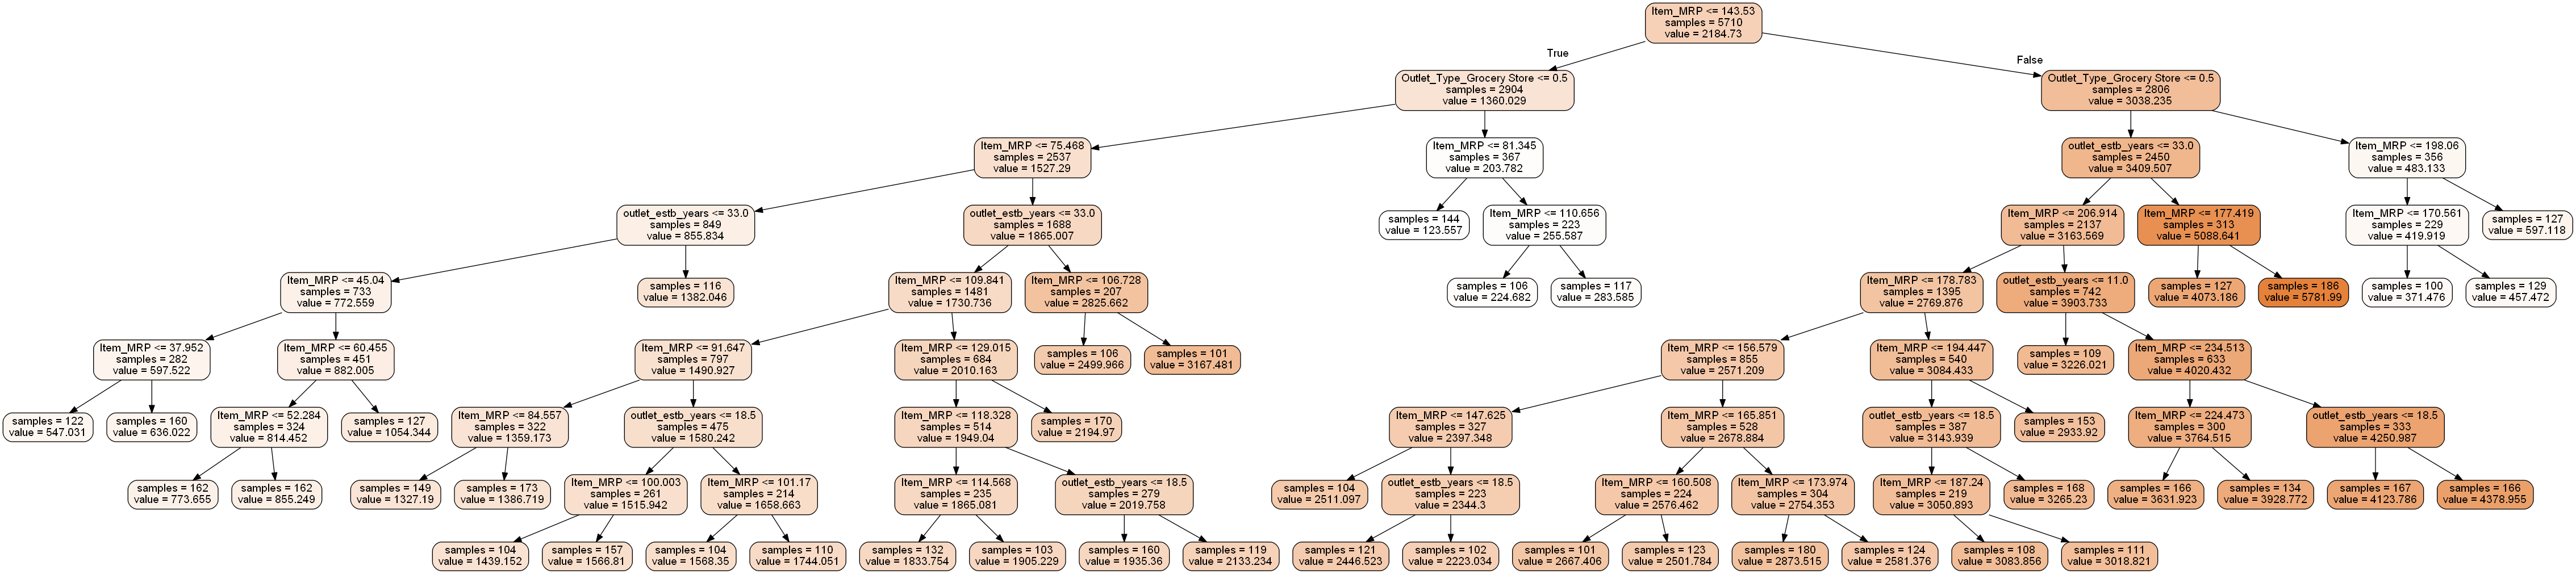

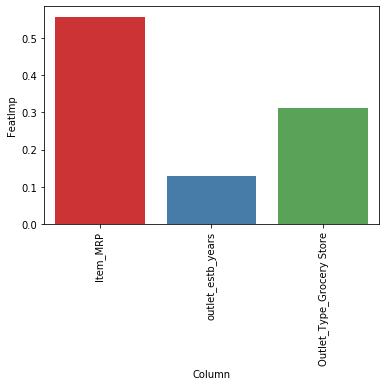

In [28]:
param = [0, 10, 100]
featureSelec = ['Item_MRP', 'outlet_estb_years', 'Outlet_Type_Grocery Store']
    
score, rmse, pred_sub, reg = regressionAnalysis('DTR', param)

#view the decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn import tree
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
tree.export_graphviz(reg, out_file = dot_data, feature_names = featureSelec, filled=True, rounded=True, impurity=False)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

0.6059848771290619
0.5744274947780884
RMSE: 1106.201021
RMSE Train: 1074.406358


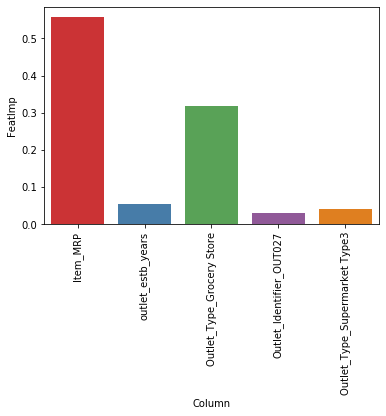

In [30]:
param = [0, 5, 100, 200, 5 ]
featureSelec = ['Item_MRP', 'outlet_estb_years', 'Outlet_Type_Grocery Store', 'Outlet_Identifier_OUT027', 'Outlet_Type_Supermarket Type3']
    
score, rmse, pred_sub, reg = regressionAnalysis('RFR', param)

In [64]:
#XGBoost
import xgboost as xgb

selectedFeatures = x_train.columns
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 3, alpha = 10, n_estimators = 100)
print(x_train.shape)
xg_reg.fit(x_train[selectedFeatures], y_train)

# xg_reg.fit(df, Y)
# pred_sub = xg_reg.predict(submission_test)

pred_sub = xg_reg.predict(submission_test[selectedFeatures])

pred = xg_reg.predict(x_test[selectedFeatures])
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE: %f" % (rmse))

pred_train = xg_reg.predict(x_train[selectedFeatures])
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
print("RMSE Train: %f" % (rmse_train))


XGBmatrix = xgb.DMatrix(data=x_train[selectedFeatures],label=y_train)

params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 3, 'alpha': 10}

cv_val = xgb.cv(dtrain=XGBmatrix, params=params, nfold=3,
                    num_boost_round=100,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

print(cv_val)


featureImp = xg_reg.feature_importances_
boxPltDf = pd.DataFrame()
boxPltDf['Column'] = x_train.columns
boxPltDf['FeatImp'] = featureImp
ax = sns.barplot(x ='Column' ,y='FeatImp',data=boxPltDf,palette="Set1" )
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

selectedFeatures = boxPltDf.loc[boxPltDf['FeatImp']>0.01, 'Column']
selectedFeatures.tolist()

(5710, 30)


C:\Users\16476\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [ ]:
#SVM
from sklearn.svm import SVR
reg = SVR(C=1.0, epsilon=0.2).fit(X, y)
print(reg.score(X, Y))

pred = reg.predict(testSubSet.to_numpy())


In [66]:

base1['Item_Outlet_Sales'] = np.abs(pred_sub)

#Export submission file
base1.to_csv("alg0.csv",index=False)
base1.head()

C:\Users\16476\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1703.832031
1,FDW14,OUT017,1462.170898
2,NCN55,OUT010,902.588257
3,FDQ58,OUT017,2562.543945
4,FDY38,OUT027,5966.549805
